# Assignment 2 Time Series


Slide 2. Download the following series from https://fred.stlouisfed.org/ (or import them from “DataAssignment2.xlsx”) and describe them:(NA000334Q, GDPDEF, B230RC0Q173SBEA)
Slide 3. Focus on the sample from 1970 to 2022. Compute real gross domestic product in per capita terms and plot it.
Slide 4. What is the sample average of (annualized) per capita GDP growth (rgdppct)? Use the following formula: ∆𝑟𝑔𝑑𝑝𝑝𝑐𝑡 = 400 × 𝑙𝑜𝑔 (𝑟𝑔𝑑𝑝𝑝𝑐𝑡 𝑟𝑔𝑑𝑝𝑝𝑐𝑡−1).
Slide 5. Plot the sample autocorrelation sample of ∆𝑟𝑔𝑑𝑝𝑝𝑐𝑡 and log(𝑟𝑔𝑑𝑝𝑝𝑐𝑡).
Slide 6. Use data from 1970 to 2019 (last quarter) to estimate a Random Walk with Drift and a Seasonal Random Walk with Drift model for log(𝑟𝑔𝑑𝑝𝑝𝑐𝑡). Forecast 2020 (quarter 1)-2022 (quarter 4). Plot 𝑟𝑔𝑑𝑝𝑝𝑐𝑡 and the two forecasts for 𝑟𝑔𝑑𝑝𝑝𝑐𝑡 (you need to transform the log forecast).
Slide 7. Compute the Root Mean Squared Forecast Error of the two models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xlrd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
import statsmodels.api as sm
import math
import random


In [2]:
# Specify the path to your Excel file (with .xls extension)
excel_file_path = 'DataAssignment2.xls'  # Replace with your actual file path

# Read the Excel file into a DataFrame using the 'xlrd' engine
data = pd.read_excel(excel_file_path, engine='xlrd')

# Now, 'data' contains your Excel data, and you can access it like a DataFrame.
# For example, to see the first few rows of data:
print(data.head())

                 FRED Graph Observations Unnamed: 1 Unnamed: 2 Unnamed: 3
0          Federal Reserve Economic Data        NaN        NaN        NaN
1      Link: https://fred.stlouisfed.org        NaN        NaN        NaN
2  Help: https://fredhelp.stlouisfed.org        NaN        NaN        NaN
3             Economic Research Division        NaN        NaN        NaN
4      Federal Reserve Bank of St. Louis        NaN        NaN        NaN


In [3]:
data.head(15)


,FRED Graph Observations,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Federal Reserve Economic Data,NaN,NaN,NaN
1,Link: https://fred.stlouisfed.org,NaN,NaN,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN,NaN,NaN
3,Economic Research Division,NaN,NaN,NaN
4,Federal Reserve Bank of St. Louis,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,GDPDEF,Gross Domestic Product: Implicit Price Deflato...,NaN,NaN
7,NA000334Q,"Gross Domestic Product, Millions of Dollars, Q...",NaN,NaN
8,B230RC0Q173SBEA,"Population, Thousands, Quarterly, Not Seasonal...",NaN,NaN
9,NaN,NaN,NaN,NaN


In [4]:
data = data.iloc[12:]  # This will drop the first 11 rows

In [5]:

data.columns = ['date', 'price_defl', 'gdp_nom', 'population']  # Rename columns
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')  # Convert the 'Date' column to datetime
data['date'] = data['date'].dt.strftime('%Y-%m-%d 00:00:00')  # Format the 'Date' column as specified
data['date'] = pd.to_datetime(data['date'])


In [6]:
data

,date,price_defl,gdp_nom,population
12,1970-01-01,21.28,253998,204086
13,1970-04-01,21.577,268532,204721
14,1970-07-01,21.754,268019,205419
15,1970-10-01,22.042,282764,206130
16,1971-01-01,22.376,273782,206763
...,...,...,...,...
219,2021-10-01,121.708,6203369,332786
220,2022-01-01,124.174,6010733,332978
221,2022-04-01,126.907,6352982,333321
222,2022-07-01,128.269,6439154,333799


In [7]:
data['population'] = data['population'] / 1000 # put population in milions

In [8]:
# computing the real GDP
data['gdp_real'] = data['gdp_nom'] / (data['price_defl'] / 100)

In [9]:
data['years'] = data['date'].dt.year

# SLIDE 2

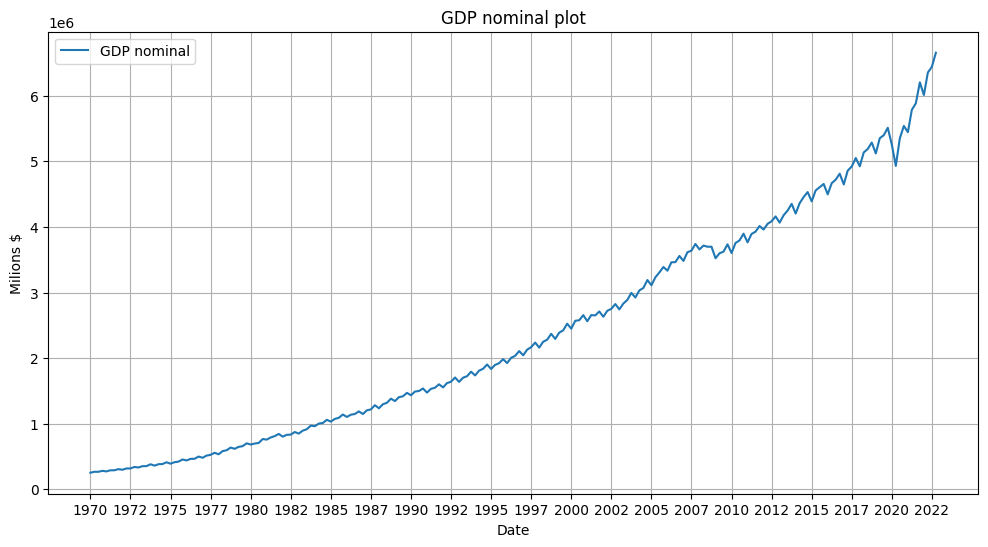

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['gdp_nom'], label='GDP nominal')
plt.xticks(data['date'][::10], data['years'][::10])  # Set x-axis ticks to 'years' with a step of 10
plt.xlabel('Date')
plt.ylabel('Milions $')
plt.title('GDP nominal plot')
plt.legend()
plt.grid(True)
plt.savefig('gdp_nominal.jpg', format = 'jpeg')
plt.show()


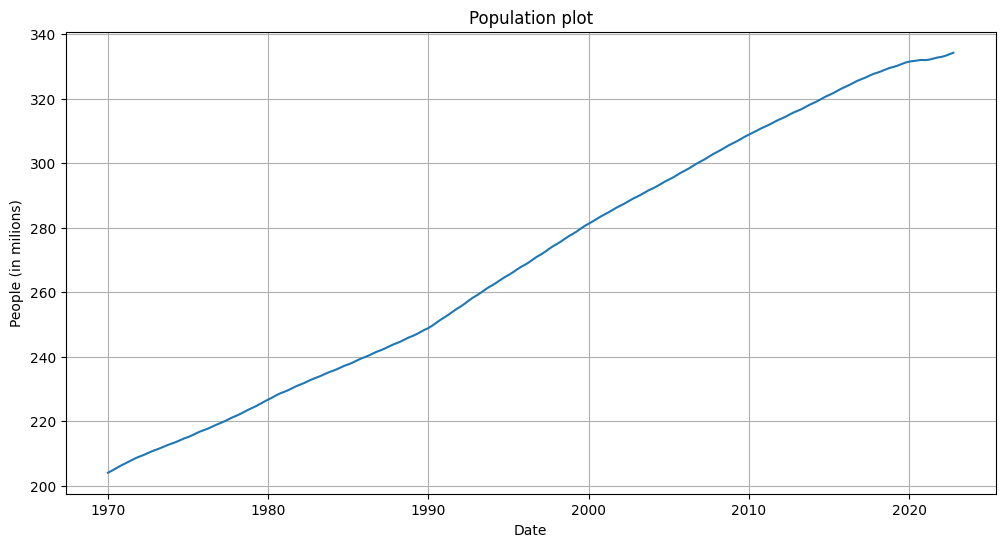

In [11]:
# population
plt.figure(figsize=(12, 6))

plt.plot(data['date'], data['population'])
plt.title('Population plot')
plt.xlabel('Date')
plt.ylabel('People (in milions)')
plt.grid(True)
plt.savefig('population.jpg', format = 'jpeg')
plt.show()

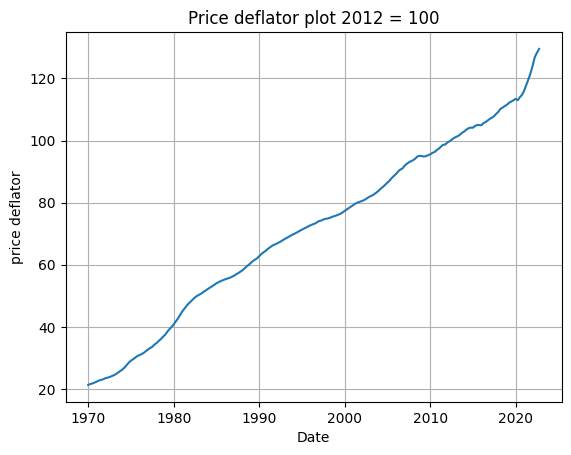

In [12]:
# Price Deflator
plt.plot(data['date'], data['price_defl'])
plt.title('Price deflator plot 2012 = 100')
plt.xlabel('Date')
plt.ylabel('price deflator')
plt.grid(True)
plt.savefig('price_defl.jpg', format = 'jpeg')


In [13]:
data

,date,price_defl,gdp_nom,population,gdp_real,years
12,1970-01-01,21.28,253998,204.086,1193599.62406,1970
13,1970-04-01,21.577,268532,204.721,1244528.89651,1970
14,1970-07-01,21.754,268019,205.419,1232044.681438,1970
15,1970-10-01,22.042,282764,206.13,1282841.847382,1970
16,1971-01-01,22.376,273782,206.763,1223552.020021,1971
...,...,...,...,...,...,...
219,2021-10-01,121.708,6203369,332.786,5096927.89299,2021
220,2022-01-01,124.174,6010733,332.978,4840572.905761,2022
221,2022-04-01,126.907,6352982,333.321,5006013.852664,2022
222,2022-07-01,128.269,6439154,333.799,5020039.136502,2022


# SLIDE 3

In [14]:
# real GDP per capita
data['gdp_per_cap'] = data['gdp_real'] / data['population']

In [15]:
data['gdp_per_cap'] = data['gdp_per_cap'].astype('float')

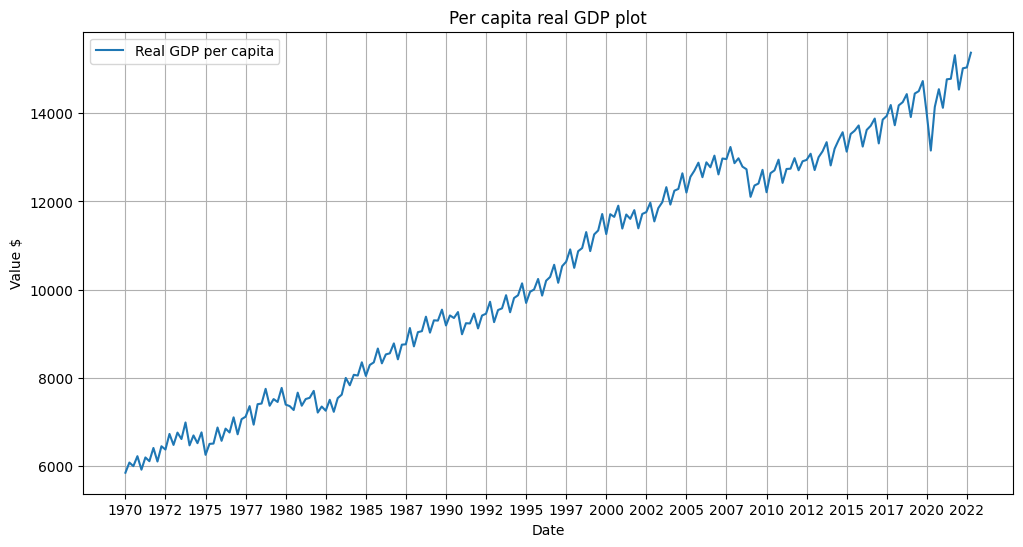

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['gdp_per_cap'], label='Real GDP per capita')
plt.xticks(data['date'][::10], data['years'][::10])  # Set x-axis ticks to 'years' with a step of 10
plt.xlabel('Date')
plt.ylabel('Value $')
plt.title('Per capita real GDP plot')
plt.legend()
plt.grid(True)
plt.savefig('gdp_per_cap.jpg', format='jpeg')
plt.show()

# SLIDE 4

In [17]:
data['gdp_per_cap'] = data['gdp_per_cap'].astype('float')

data['delta_rgdpcc'] = 400 * np.log(data['gdp_per_cap'] / data['gdp_per_cap'].shift(1))


In [18]:
data

,date,price_defl,gdp_nom,population,gdp_real,years,gdp_per_cap,delta_rgdpcc
12,1970-01-01,21.28,253998,204.086,1193599.62406,1970,5848.513000,NaN
13,1970-04-01,21.577,268532,204.721,1244528.89651,1970,6079.146236,15.470729
14,1970-07-01,21.754,268019,205.419,1232044.681438,1970,5997.715311,-5.394260
15,1970-10-01,22.042,282764,206.13,1282841.847382,1970,6223.460182,14.778975
16,1971-01-01,22.376,273782,206.763,1223552.020021,1971,5917.654609,-20.154345
...,...,...,...,...,...,...,...,...
219,2021-10-01,121.708,6203369,332.786,5096927.89299,2021,15315.932440,14.215921
220,2022-01-01,124.174,6010733,332.978,4840572.905761,2022,14537.215389,-20.872673
221,2022-04-01,126.907,6352982,333.321,5006013.852664,2022,15018.597246,13.030924
222,2022-07-01,128.269,6439154,333.799,5020039.136502,2022,15039.107776,0.545898


In [19]:
# sample mean rgdpcc
mean_per_capita_growth = data['delta_rgdpcc'].mean()
mean_per_capita_growth

1.8320035598203506

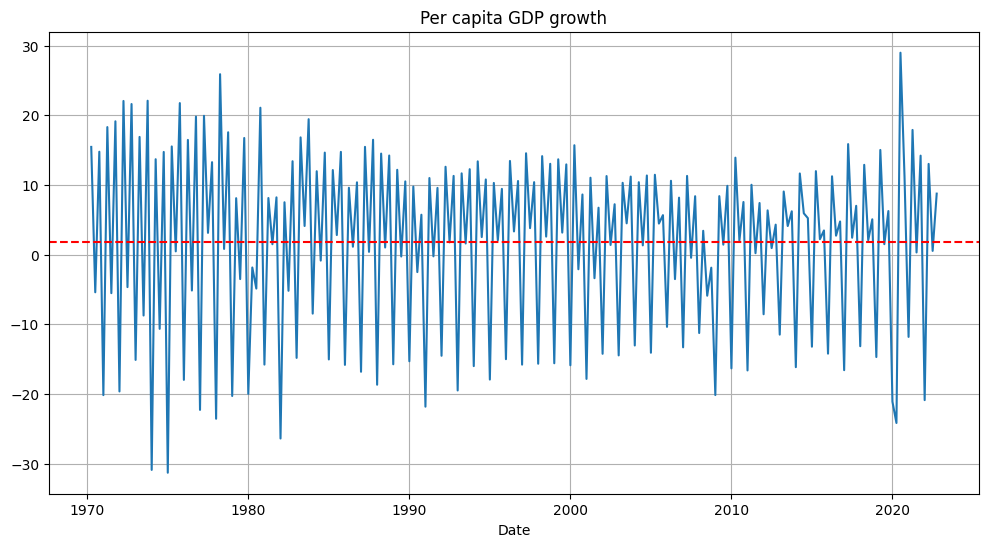

In [20]:
plt.figure(figsize=(12, 6))

plt.plot(data['date'], data['delta_rgdpcc'])
plt.title('Per capita GDP growth')
plt.xlabel('Date')
plt.axhline(mean_per_capita_growth, 
            color = 'red', 
            linestyle = '--',
            label = 'mean per capita growth')

plt.grid(True)
plt.savefig('rgdpcc.jpg', format = 'jpeg')
plt.show()

# SLIDE 5

In [21]:
df = pd.DataFrame(data[['date', 'delta_rgdpcc']].set_index(['date']))
df

,delta_rgdpcc
date,
1970-01-01,NaN
1970-04-01,15.470729
1970-07-01,-5.394260
1970-10-01,14.778975
1971-01-01,-20.154345
...,...
2021-10-01,14.215921
2022-01-01,-20.872673
2022-04-01,13.030924


In [22]:
autocorrelation = df['delta_rgdpcc'].autocorr(lag=1)

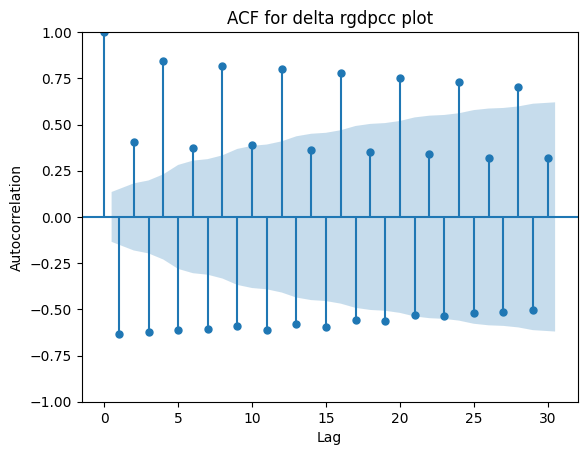

In [23]:
plot_acf(df['delta_rgdpcc'].dropna(), lags=30)  # Adjust 'lags' as needed
plt.title('ACF for delta rgdpcc plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.savefig("ac_d_rgdpcc.jpg", format='jpeg')
plt.show()

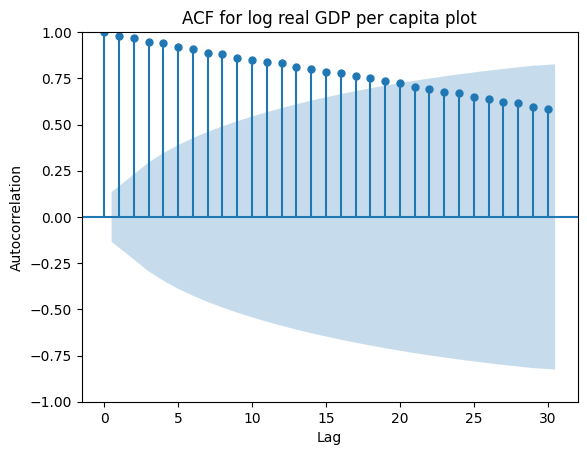

In [24]:
plot_acf(np.log(data['gdp_per_cap'].astype('float').dropna()), lags=30)  # adjust the lags
plt.title('ACF for log real GDP per capita plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.savefig("ac_rgdpcc.jpg", format='jpeg')
plt.show()

# SLIDE 6

In [25]:
data.set_index('date', inplace=True)
data

,price_defl,gdp_nom,population,gdp_real,years,gdp_per_cap,delta_rgdpcc
date,,,,,,,
1970-01-01,21.28,253998,204.086,1193599.62406,1970,5848.513000,NaN
1970-04-01,21.577,268532,204.721,1244528.89651,1970,6079.146236,15.470729
1970-07-01,21.754,268019,205.419,1232044.681438,1970,5997.715311,-5.394260
1970-10-01,22.042,282764,206.13,1282841.847382,1970,6223.460182,14.778975
1971-01-01,22.376,273782,206.763,1223552.020021,1971,5917.654609,-20.154345
...,...,...,...,...,...,...,...
2021-10-01,121.708,6203369,332.786,5096927.89299,2021,15315.932440,14.215921
2022-01-01,124.174,6010733,332.978,4840572.905761,2022,14537.215389,-20.872673
2022-04-01,126.907,6352982,333.321,5006013.852664,2022,15018.597246,13.030924


In [26]:
# compute the log
data['log_rgdppc'] = np.log(data['gdp_per_cap'])
data

,price_defl,gdp_nom,population,gdp_real,years,gdp_per_cap,delta_rgdpcc,log_rgdppc
date,,,,,,,,
1970-01-01,21.28,253998,204.086,1193599.62406,1970,5848.513000,NaN,8.673943
1970-04-01,21.577,268532,204.721,1244528.89651,1970,6079.146236,15.470729,8.712620
1970-07-01,21.754,268019,205.419,1232044.681438,1970,5997.715311,-5.394260,8.699134
1970-10-01,22.042,282764,206.13,1282841.847382,1970,6223.460182,14.778975,8.736081
1971-01-01,22.376,273782,206.763,1223552.020021,1971,5917.654609,-20.154345,8.685695
...,...,...,...,...,...,...,...,...
2021-10-01,121.708,6203369,332.786,5096927.89299,2021,15315.932440,14.215921,9.636649
2022-01-01,124.174,6010733,332.978,4840572.905761,2022,14537.215389,-20.872673,9.584467
2022-04-01,126.907,6352982,333.321,5006013.852664,2022,15018.597246,13.030924,9.617045


In [27]:
# extract year and quarter
filtered_df = data
filtered_df.index = pd.to_datetime(filtered_df.index)
filtered_df['Year'] = filtered_df.index.year
filtered_df['Quarter'] = filtered_df.index.quarter

In [28]:
# limit the span of the observations as requested

train = filtered_df[1:-12]
test = filtered_df[-12:]

train.tail()

,price_defl,gdp_nom,population,gdp_real,years,gdp_per_cap,delta_rgdpcc,log_rgdppc,Year,Quarter
date,,,,,,,,,,
2018-10-01,111.132,5285745,329.522,4756276.320052,2018,14433.865782,5.079220,9.577333,2018,4
2019-01-01,111.562,5120261,329.868,4589610.261559,2019,13913.475274,-14.687768,9.540613,2019,1
2019-04-01,112.184,5352103,330.245,4770825.60793,2019,14446.321997,15.032814,9.578195,2019,2
2019-07-01,112.55,5397764,330.729,4795880.941804,2019,14500.938659,1.509413,9.581969,2019,3
2019-10-01,112.963,5511056,331.208,4878638.138151,2019,14729.831822,6.264572,9.597630,2019,4


In [29]:

start_year = 1970
end_year = 2019
quarters_per_year = 4

# compute the parametere c_hat that will be used in the random walk
c_hat = (train['log_rgdppc'].iloc[-1] - train['log_rgdppc'].iloc[1])/len(train)

# parameter of the random walk
n = (end_year - start_year + 1)*4

# generate the model
random_walk = np.zeros(n)
random_walk[0] = train['log_rgdppc'].iloc[0]

for t in range(1,n):
    random_walk[t] = c_hat*t + train['log_rgdppc'].iloc[-1] + np.random.normal(0,1)

# add the random walk as a new column in your DataFrame if needed
random_walk = random_walk[:len(train)]
train['RandomWalk'] = random_walk

C:\Users\Enrico\AppData\Local\Temp\ipykernel_10456\706417986.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['RandomWalk'] = random_walk


In [30]:
# Use the trained model to generate predictions for the "test" data
n_test = len(test)
random_walk_test = np.zeros(n_test)
random_walk_test[0] = train['log_rgdppc'].iloc[-1]  # Start with the last value from training data

for t in range(1, n_test):
    random_walk_test[t] = c_hat*t + train['log_rgdppc'].iloc[-1] 

# Update the "RandomWalk" column in the "test" DataFrame with the predictions
test['RandomWalk'] = random_walk_test

C:\Users\Enrico\AppData\Local\Temp\ipykernel_10456\898194142.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['RandomWalk'] = random_walk_test


In [31]:
# Combine the "train" and "test" DataFrames back into one
combined_df = pd.concat([train, test], ignore_index=False)

# Print or inspect the updated DataFrame with predictions
combined_df.tail(12)

,price_defl,gdp_nom,population,gdp_real,years,gdp_per_cap,delta_rgdpcc,log_rgdppc,Year,Quarter,RandomWalk
date,,,,,,,,,,,
2020-01-01,113.418,5254152,331.534,4632555.678993,2020,13973.093797,-21.096482,9.544889,2020,1,9.597630
2020-04-01,112.993,4930197,331.699,4363276.486154,2020,13154.325114,-24.153199,9.484506,2020,2,9.602145
2020-07-01,113.971,5349433,331.872,4693679.093805,2020,14143.040370,28.988818,9.556978,2020,3,9.606660
2020-10-01,114.692,5539370,332.045,4829778.88606,2020,14545.555229,11.225123,9.585041,2020,4,9.611175
2021-01-01,116.12,5444406,331.989,4688603.169135,2021,14122.766625,-11.798926,9.555543,2021,1,9.615690
2021-04-01,117.922,5784816,332.149,4905629.144689,2021,14769.362981,17.906727,9.600310,2021,2,9.620205
2021-07-01,119.712,5883177,332.48,4914442.161187,2021,14781.166269,0.319542,9.601109,2021,3,9.624720
2021-10-01,121.708,6203369,332.786,5096927.89299,2021,15315.932440,14.215921,9.636649,2021,4,9.629235
2022-01-01,124.174,6010733,332.978,4840572.905761,2022,14537.215389,-20.872673,9.584467,2022,1,9.633751


In [32]:
combined_df['Exp_RW'] = np.exp(combined_df['RandomWalk'])

combined_df.tail(12)

,price_defl,gdp_nom,population,gdp_real,years,gdp_per_cap,delta_rgdpcc,log_rgdppc,Year,Quarter,RandomWalk,Exp_RW
date,,,,,,,,,,,,
2020-01-01,113.418,5254152,331.534,4632555.678993,2020,13973.093797,-21.096482,9.544889,2020,1,9.597630,14729.831822
2020-04-01,112.993,4930197,331.699,4363276.486154,2020,13154.325114,-24.153199,9.484506,2020,2,9.602145,14796.488207
2020-07-01,113.971,5349433,331.872,4693679.093805,2020,14143.040370,28.988818,9.556978,2020,3,9.606660,14863.446230
2020-10-01,114.692,5539370,332.045,4829778.88606,2020,14545.555229,11.225123,9.585041,2020,4,9.611175,14930.707255
2021-01-01,116.12,5444406,331.989,4688603.169135,2021,14122.766625,-11.798926,9.555543,2021,1,9.615690,14998.272655
2021-04-01,117.922,5784816,332.149,4905629.144689,2021,14769.362981,17.906727,9.600310,2021,2,9.620205,15066.143806
2021-07-01,119.712,5883177,332.48,4914442.161187,2021,14781.166269,0.319542,9.601109,2021,3,9.624720,15134.322091
2021-10-01,121.708,6203369,332.786,5096927.89299,2021,15315.932440,14.215921,9.636649,2021,4,9.629235,15202.808902
2022-01-01,124.174,6010733,332.978,4840572.905761,2022,14537.215389,-20.872673,9.584467,2022,1,9.633751,15271.605633


## Seasonal Random Walk

In [33]:
# parameters of the seasonal random walk
n = (end_year - start_year + 1)*4
s = 4

# generate the model
seasonal_random_walk = np.zeros(n)
seasonal_random_walk[0] = train['log_rgdppc'].iloc[0]

for t in range(1,n):
    seasonal_random_walk[t] = c_hat + train['log_rgdppc'].iloc[-s] + np.random.normal(0,1)

# add the random walk as a new column in your DataFrame if needed
seasonal_random_walk = seasonal_random_walk[:len(train)]
train['SeasonalRandomWalk'] = seasonal_random_walk

C:\Users\Enrico\AppData\Local\Temp\ipykernel_10456\2660626131.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SeasonalRandomWalk'] = seasonal_random_walk


In [34]:
# Use the trained model to generate predictions for the "test" data
n_test = len(test)
seasonal_random_walk_test = np.zeros(n_test)
seasonal_random_walk_test[0] = train['log_rgdppc'].iloc[-1]  # Start with the last value from training data
seasonal = train['log_rgdppc'].iloc[-4:]

values = list(seasonal)*3
c_hats = [c_hat]*12
results = []

# Multiply each element in c_hats by its index (position) plus one
for i, c_hat in enumerate(c_hats):
    result = c_hat * (i + 1)
    results.append(result)

sum_results = [a + b for a, b in zip(values, results)]

np.exp(sum_results)

# Update the "SeasonalRandomWalk" column in the "test" DataFrame with the predictions
test['SeasonalRandomWalk'] = sum_results

C:\Users\Enrico\AppData\Local\Temp\ipykernel_10456\3808074861.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SeasonalRandomWalk'] = sum_results


In [35]:
# Combine the "train" and "test" DataFrames back into one
combined_df2 = pd.concat([train, test], ignore_index=False)

combined_df2['Exp_SRW'] = np.exp(combined_df2['SeasonalRandomWalk'])

# Print or inspect the updated DataFrame with predictions
combined_df2.tail(12)

,price_defl,gdp_nom,population,gdp_real,years,gdp_per_cap,delta_rgdpcc,log_rgdppc,Year,Quarter,RandomWalk,SeasonalRandomWalk,Exp_SRW
date,,,,,,,,,,,,,
2020-01-01,113.418,5254152,331.534,4632555.678993,2020,13973.093797,-21.096482,9.544889,2020,1,9.597630,9.545128,13976.437429
2020-04-01,112.993,4930197,331.699,4363276.486154,2020,13154.325114,-24.153199,9.484506,2020,2,9.602145,9.587225,14577.364685
2020-07-01,113.971,5349433,331.872,4693679.093805,2020,14143.040370,28.988818,9.556978,2020,3,9.606660,9.595514,14698.692603
2020-10-01,114.692,5539370,332.045,4829778.88606,2020,14545.555229,11.225123,9.585041,2020,4,9.611175,9.615690,14998.272655
2021-01-01,116.12,5444406,331.989,4688603.169135,2021,14122.766625,-11.798926,9.555543,2021,1,9.615690,9.563188,14231.148179
2021-04-01,117.922,5784816,332.149,4905629.144689,2021,14769.362981,17.906727,9.600310,2021,2,9.620205,9.605285,14843.026911
2021-07-01,119.712,5883177,332.48,4914442.161187,2021,14781.166269,0.319542,9.601109,2021,3,9.624720,9.613574,14966.565945
2021-10-01,121.708,6203369,332.786,5096927.89299,2021,15315.932440,14.215921,9.636649,2021,4,9.629235,9.633751,15271.605633
2022-01-01,124.174,6010733,332.978,4840572.905761,2022,14537.215389,-20.872673,9.584467,2022,1,9.633751,9.581249,14490.500852


#### Plots

In [36]:
# Create a time index for the last 12 quarters
n = len(combined_df['RandomWalk'].iloc[-12:])
start_time = combined_df.index[-12]  # Time corresponding to the start of the last 12 quarters
time_index = pd.date_range(start = start_time, 
                           periods = n, 
                           freq='Q')

time_index

DatetimeIndex(['2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

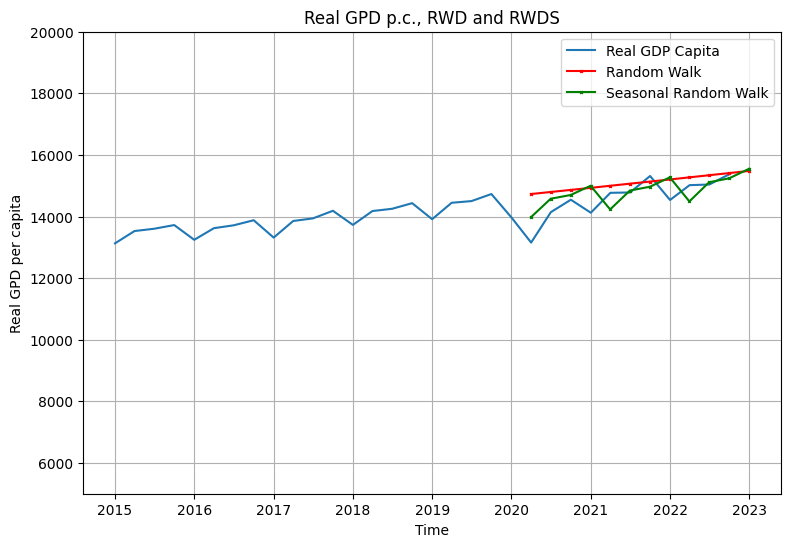

In [37]:
# Create a time index for the last 12 quarters
n = len(combined_df['RandomWalk'].iloc[-12:])
start_time = combined_df.index[-12]  # Time corresponding to the start of the last 12 quarters
time_index = pd.date_range(start = start_time, 
                           periods = n, 
                           freq='Q')

plt.figure(figsize=(9,6))
plt.xlabel('Time')
plt.ylabel('Real GPD per capita')
plt.title('Real GPD p.c., RWD and RWDS')
plt.ylim(5000, 20000)
plt.grid(True)

# plot all the 212 observations of RGDP_capita
plt.plot(combined_df.index[-32:], 
         combined_df['gdp_per_cap'].iloc[-32:], 
         label='Real GDP Capita')

# Plot the last 12 quarters based on RandomWalk
plt.plot(time_index, 
         combined_df['Exp_RW'].iloc[199:], 
         label='Random Walk', 
         linestyle='-', 
         marker='x', 
         markersize=2,
         color = 'red')

# Plot the last 12 quarters based on SeasonalRandomWalk
plt.plot(time_index, 
         combined_df2['Exp_SRW'].iloc[199:], 
         label='Seasonal Random Walk', 
         linestyle='-', 
         marker='x', 
         markersize=2,
         color = 'green')

plt.legend()
plt.savefig('forcasts.jpg', format = 'jpeg')
plt.show()

# SLIDE 7

In [38]:
actual_values = combined_df['gdp_per_cap'].iloc[-12:]
random_walk_predictions = combined_df['Exp_RW'].iloc[-12:]
seasonal_random_walk_predictions = combined_df2['Exp_SRW'].iloc[-12:]

rmse_random_walk = np.sqrt(np.mean((actual_values - random_walk_predictions)**2)).round(2)
rmse_seasonal_random_walk = np.sqrt(np.mean((actual_values - seasonal_random_walk_predictions)**2)).round(2)

print("RMSE for random walk with drift is", rmse_random_walk)
print("RMSE for seasonal RW with drift is", rmse_seasonal_random_walk)

RMSE for random walk with drift is 690.48
RMSE for seasonal RW with drift is 472.15


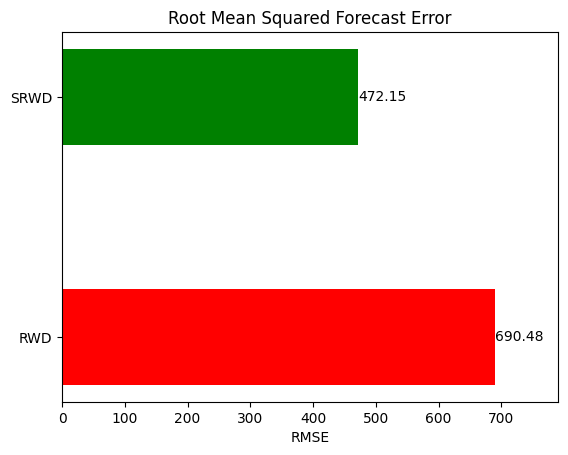

In [39]:

import matplotlib.pyplot as plt

models = ['RWD', 'SRWD']
rmse_values = [rmse_random_walk, rmse_seasonal_random_walk]
colors = ['red', 'green']

fig, ax = plt.subplots()

bars = ax.barh(models, rmse_values, color=colors, height=0.4)
plt.xlabel("RMSE")
plt.title("Root Mean Squared Forecast Error")

# Add the respective values inside the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='left', va='center')


# Adjust the x-axis limits to make it longer
ax.set_xlim(0, max(rmse_values) + 100) 
plt.savefig('rmse.jpg', format = 'jpeg')
plt.show()
